<a href="https://colab.research.google.com/github/plaban1981/DEEP-LEARNING-/blob/master/MNIST_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Classification**
 Introductory CNN Model: MNIST Digits
 In this example, we will download the MNIST handwritten digits and create a simple CNN network to predict the digit category (0-9)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from tensorflow.python.framework import ops
ops.reset_default_graph()

*Start a graph Session*

In [0]:
sess = tf.Session()

*Load Data*

In [0]:
data_dir = 'temp'
mnist = read_data_sets(data_dir)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting temp/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting temp/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting temp/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting temp/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
mnist.train.images.shape

(55000, 784)

*Convert images into 28x28 (they are downloaded as 1x784)*

In [0]:
x_train = []
for i in mnist.train.images:
  x_train.append(np.array(i).reshape(28,28))
x_test = []
for i in mnist.test.images:
  x_test.append(np.array(i).reshape(28,28))

In [0]:
len(x_train),x_train[0].shape

(55000, (28, 28))

In [0]:
x_train = np.array(x_train)
x_train.shape

(55000, 28, 28)

In [0]:
x_test = np.array(x_test)
x_test.shape

(10000, 28, 28)

In [0]:
# Convert images into 28x28 (they are downloaded as 1x784)
train_xdata = np.array([np.reshape(x, (28,28)) for x in mnist.train.images])
test_xdata = np.array([np.reshape(x, (28,28)) for x in mnist.test.images])

In [0]:
train_xdata.shape,test_xdata.shape

((55000, 28, 28), (10000, 28, 28))

* Convert labels into one-hot encoded vectors*

In [0]:

train_labels = mnist.train.labels
test_labels = mnist.test.labels

In [0]:
train_labels[0]

7

*Set Model Parameters*

In [0]:
batch_size = 100
#learning_rate = 0.005
learning_rate = 0.001
evaluation_size = 500
image_width = train_xdata[0].shape[0]
image_height = train_xdata[0].shape[1]
target_size = max(train_labels) + 1
print(image_width,target_size,target_size)
num_channels = 1 # greyscale = 1 channel
generations = 500
eval_every = 5
#
conv1_features = 25 #number of neurons in conv layer 1
conv2_features = 50  #number of neurons in conv layer 2
conv3_features = 75  #number of neurons in conv layer 3
#
max_pool_size1 = 2 # NxN window for 1st max pool layer
max_pool_size2 = 2 # NxN window for 2nd max pool layer
max_pool_size3 = 2 # NxN window for 3rd max pool layer
#
fully_connected_size1 = 100

28 10 10


*Declare model placeholders*

In [0]:
x_input_shape = (batch_size, image_width, image_height, num_channels)
#
x_input = tf.placeholder(tf.float32, shape=x_input_shape)
y_target = tf.placeholder(tf.int32, shape=(batch_size))
#
eval_input_shape = (evaluation_size, image_width, image_height, num_channels)
#
eval_input = tf.placeholder(tf.float32, shape=eval_input_shape)
eval_target = tf.placeholder(tf.int32, shape=(evaluation_size))


*Declare Model Parameters*

In [0]:
conv1_weight = tf.Variable(tf.truncated_normal([4, 4, num_channels, conv1_features],stddev=0.1, dtype=tf.float32))
conv1_bias = tf.Variable(tf.zeros([conv1_features], dtype=tf.float32))

conv2_weight = tf.Variable(tf.truncated_normal([4, 4, conv1_features, conv2_features],stddev=0.1, dtype=tf.float32))
conv2_bias = tf.Variable(tf.zeros([conv2_features], dtype=tf.float32))

conv3_weight = tf.Variable(tf.truncated_normal([4, 4, conv2_features, conv3_features],stddev=0.1, dtype=tf.float32))
conv3_bias = tf.Variable(tf.zeros([conv3_features], dtype=tf.float32))

*fully connected variables*

In [0]:
resulting_width = image_width // (max_pool_size1 * max_pool_size2)
resulting_height = image_height // (max_pool_size1 * max_pool_size2)
#
full1_input_size = resulting_width * resulting_height * conv2_features
#
full1_weight = tf.Variable(tf.truncated_normal([full1_input_size, fully_connected_size1],stddev=0.1, dtype=tf.float32))
full1_bias = tf.Variable(tf.truncated_normal([fully_connected_size1], stddev=0.1, dtype=tf.float32))
#
full2_weight = tf.Variable(tf.truncated_normal([fully_connected_size1, target_size],stddev=0.1, dtype=tf.float32))
full2_bias = tf.Variable(tf.truncated_normal([target_size], stddev=0.1, dtype=tf.float32))


*Initialize Model Operations*

In [0]:
def my_conv_net(input_data):
    # First Conv-ReLU-MaxPool Layer
    conv1 = tf.nn.conv2d(input_data, conv1_weight, strides=[1, 1, 1, 1], padding='SAME')
    relu1 = tf.nn.relu(tf.nn.bias_add(conv1, conv1_bias))
    max_pool1 = tf.nn.max_pool(relu1, ksize=[1, max_pool_size1, max_pool_size1, 1],strides=[1, max_pool_size1, max_pool_size1, 1], padding='SAME')

    # Second Conv-ReLU-MaxPool Layer
    conv2 = tf.nn.conv2d(max_pool1, conv2_weight, strides=[1, 1, 1, 1], padding='SAME')
    relu2 = tf.nn.relu(tf.nn.bias_add(conv2, conv2_bias))
    max_pool2 = tf.nn.max_pool(relu2, ksize=[1, max_pool_size2, max_pool_size2, 1],strides=[1, max_pool_size2, max_pool_size2, 1], padding='SAME')
    
    
    # Third Conv-ReLU-MaxPool Layer
    conv3 = tf.nn.conv2d(max_pool2, conv3_weight, strides=[1, 1, 1, 1], padding='SAME')
    relu3 = tf.nn.relu(tf.nn.bias_add(conv3, conv3_bias))
    max_pool3 = tf.nn.max_pool(relu2, ksize=[1, max_pool_size3, max_pool_size3, 1],strides=[1, max_pool_size3, max_pool_size3, 1], padding='SAME')

    # Transform Output into a 1xN layer for next fully connected layer
    final_conv_shape = max_pool3.get_shape().as_list()
    #             HEIGHT                 WIDTH                 CHANNEL
    final_shape = final_conv_shape[1] * final_conv_shape[2] * final_conv_shape[3]
    flat_output = tf.reshape(max_pool2, [final_conv_shape[0], final_shape])

    # First Fully Connected Layer
    fully_connected1 = tf.nn.relu(tf.add(tf.matmul(flat_output, full1_weight), full1_bias))

    # Second Fully Connected Layer
    final_model_output = tf.add(tf.matmul(fully_connected1, full2_weight), full2_bias)
    
    return(final_model_output)

*Instantiating the model*

In [0]:
model_output = my_conv_net(x_input)
test_model_output = my_conv_net(eval_input)

*Declare Loss Function (softmax cross entropy)*

In [0]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = model_output,labels = y_target))

*Optimizer Function*

In [0]:
# Create an optimizer
my_optimizer = tf.train.MomentumOptimizer(learning_rate, 0.9)
train_step = my_optimizer.minimize(loss)


*Create Prediction Function*

In [0]:
prediction = tf.nn.softmax(model_output)
test_prediction = tf.nn.softmax(test_model_output)

*Create Accuracy Function*

In [0]:
def get_accuracy(logits, targets):
    batch_predictions = np.argmax(logits, axis=1)
    num_correct = np.sum(np.equal(batch_predictions, targets))
    return(100. * num_correct/batch_predictions.shape[0])

*Initialize variables*

In [0]:
init = tf.global_variables_initializer()
sess.run(init)

*Train the model*

In [0]:
train_loss = []
train_acc = []
test_acc = []
for i in range(generations):
    rand_index = np.random.choice(len(train_xdata), size=batch_size)
    rand_x = train_xdata[rand_index]
    rand_x = np.expand_dims(rand_x, 3)
    rand_y = train_labels[rand_index]
    train_dict = {x_input: rand_x, y_target: rand_y}
    
    sess.run(train_step, feed_dict=train_dict)
    temp_train_loss, temp_train_preds = sess.run([loss, prediction], feed_dict=train_dict)
    temp_train_acc = get_accuracy(temp_train_preds, rand_y)
    
    if (i+1) % eval_every == 0:
        eval_index = np.random.choice(len(test_xdata), size=evaluation_size)
        eval_x = test_xdata[eval_index]
        eval_x = np.expand_dims(eval_x, 3)
        eval_y = test_labels[eval_index]
        test_dict = {eval_input: eval_x, eval_target: eval_y}
        test_preds = sess.run(test_prediction, feed_dict=test_dict)
        temp_test_acc = get_accuracy(test_preds, eval_y)
        
        # Record and print results
        train_loss.append(temp_train_loss)
        train_acc.append(temp_train_acc)
        test_acc.append(temp_test_acc)
        acc_and_loss = [(i+1), temp_train_loss, temp_train_acc, temp_test_acc]
        acc_and_loss = [np.round(x,2) for x in acc_and_loss]
        print('Generation # {}. Train Loss: {:.2f}. Train Acc (Test Acc): {:.2f} ({:.2f})'.format(*acc_and_loss))

Generation # 5. Train Loss: 2.38. Train Acc (Test Acc): 5.00 (10.40)
Generation # 10. Train Loss: 2.35. Train Acc (Test Acc): 8.00 (8.60)
Generation # 15. Train Loss: 2.25. Train Acc (Test Acc): 10.00 (7.40)
Generation # 20. Train Loss: 2.25. Train Acc (Test Acc): 13.00 (12.40)
Generation # 25. Train Loss: 2.22. Train Acc (Test Acc): 14.00 (16.40)
Generation # 30. Train Loss: 2.22. Train Acc (Test Acc): 18.00 (23.40)
Generation # 35. Train Loss: 2.16. Train Acc (Test Acc): 29.00 (30.00)
Generation # 40. Train Loss: 2.20. Train Acc (Test Acc): 17.00 (26.20)
Generation # 45. Train Loss: 2.12. Train Acc (Test Acc): 32.00 (27.80)
Generation # 50. Train Loss: 2.13. Train Acc (Test Acc): 30.00 (35.80)
Generation # 55. Train Loss: 2.10. Train Acc (Test Acc): 34.00 (38.60)
Generation # 60. Train Loss: 2.05. Train Acc (Test Acc): 37.00 (42.40)
Generation # 65. Train Loss: 2.00. Train Acc (Test Acc): 44.00 (45.40)
Generation # 70. Train Loss: 1.99. Train Acc (Test Acc): 51.00 (51.40)
Generation 

**# Matlotlib code to plot the loss and accuracies**

Plot loss over time

In [0]:
eval_indices = range(0, generations, eval_every)

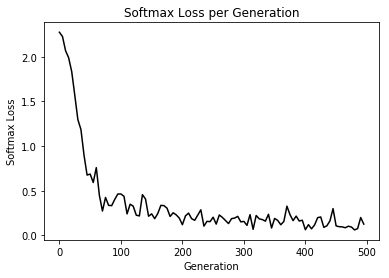

In [0]:
plt.plot(eval_indices, train_loss, 'k-')
plt.title('Softmax Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Softmax Loss')
plt.show()

* Plot train and test accuracy*

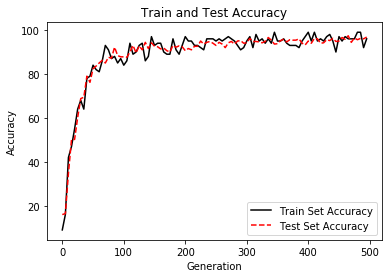

In [0]:
plt.plot(eval_indices, train_acc, 'k-', label='Train Set Accuracy')
plt.plot(eval_indices, test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

*Plot some samples*

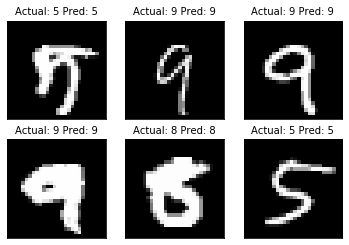

In [0]:
actuals = rand_y[0:6]
predictions = np.argmax(temp_train_preds,axis=1)[0:6]
images = np.squeeze(rand_x[0:6])

Nrows = 2
Ncols = 3
for i in range(6):
    plt.subplot(Nrows, Ncols, i+1)
    plt.imshow(np.reshape(images[i], [28,28]), cmap='Greys_r')
    plt.title('Actual: ' + str(actuals[i]) + ' Pred: ' + str(predictions[i]),
                               fontsize=10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

*Training and test accuracy for learning rate = 0.001*

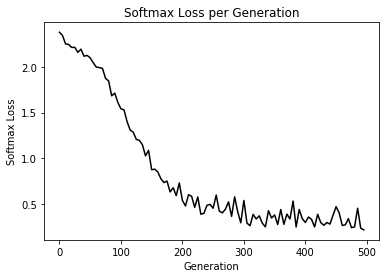

In [0]:
plt.plot(eval_indices, train_loss, 'k-')
plt.title('Softmax Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Softmax Loss')
plt.show()

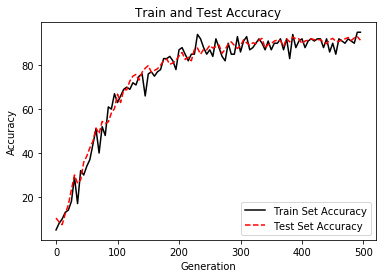

In [0]:
eval_indices = range(0, generations, eval_every)
plt.plot(eval_indices, train_acc, 'k-', label='Train Set Accuracy')
plt.plot(eval_indices, test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

*Plot some sub samples for the predictions for leraning rate =0.001*

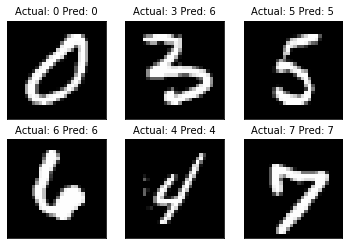

In [0]:
actuals = rand_y[0:6]
predictions = np.argmax(temp_train_preds,axis=1)[0:6]
images = np.squeeze(rand_x[0:6])

Nrows = 2
Ncols = 3
for i in range(6):
    plt.subplot(Nrows, Ncols, i+1)
    plt.imshow(np.reshape(images[i], [28,28]), cmap='Greys_r')
    plt.title('Actual: ' + str(actuals[i]) + ' Pred: ' + str(predictions[i]),
                               fontsize=10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)